In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from random import randint
from collections import defaultdict
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Purpose:
This file is intended to validate the embeddings by looking at the ability of the data to by classified using the embedding vectors. This file contains many different tests to determine an effective way to test validity of data. This includes clustering of different subsets of the data as well as seeing if a simple random forest classifier can use the data to categorize words.

## Note:
#### The embedding.npy and word.txt are in https://drive.google.com/drive/u/0/folders/1rkfOQ5EgV0_qbJvXaPQd06RqHbQXY_WA.
#### Send your gmail address to vidarmehr@gmail.com to have access the files. Then, put them in input folder.

## Load embeddings

In [2]:
embedding = np.load("../input/embedding.npy", mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

## Load pubmed words

In [3]:
words = []
with open("../input/words.txt","r") as f:
    for line in f:
        word = line[2:-3]
        words.append(word)

## Create a dataframe of words and vectors

In [4]:
df = pd.DataFrame(data=embedding,index = words)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
,-2.506652,-0.660315,3.513652,2.064573,1.016609,2.508891,-1.443799,-5.096051,1.292137,1.006947,...,-2.600289,2.294587,-0.211167,-0.904042,-3.773165,-2.465733,-2.615954,-0.592713,2.083887,0.587571
cell,-2.929329,-0.753183,3.446260,1.379164,2.485236,2.724488,-2.007528,-6.968168,1.343989,0.057638,...,-4.971962,3.170025,0.036403,-0.772250,-3.033934,-2.677931,-1.574416,0.719655,3.798445,1.526275
patient,-3.009927,-1.134339,4.749529,0.662009,2.397317,2.838428,-2.314898,-6.130804,0.585679,0.243070,...,-2.897183,3.135238,0.245946,-2.120335,-1.841553,-2.586954,-2.635705,1.164525,4.257591,0.717725
meshd009369,-2.679750,-1.177165,3.586595,2.403354,2.074462,2.940534,-2.092840,-6.245307,0.678010,0.505695,...,-5.091603,3.780937,0.313964,-2.557980,-2.331291,-2.706614,-1.122745,0.115335,3.934741,0.530273
survey,-2.788071,-1.805163,1.204242,2.901088,1.724542,2.571950,-0.919250,-6.229417,1.000043,0.423170,...,-4.554814,2.469184,0.490396,-1.423632,-3.272070,-2.532732,-1.509117,0.588215,3.166957,1.333367


## Create a new column "target" to identify "meshd" and "ncbigene" terms

In [5]:
target= []
for i in df.index:
    if(i.startswith('ncbigene')):
        target.append("ncbigene")
    else:
        target.append("none")
df_with_target = df.copy()
df_with_target["target"]=target
df_with_target.head()
df_ncbigen = df.loc[df_with_target["target"] == "ncbigene"]
df_ncbigen

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene7157,-2.929071,-1.833047,4.213442,2.010140,1.205198,2.607494,-1.386567,-6.974753,0.730687,-0.152255,...,-3.507387,3.038072,0.121795,-2.272417,-1.129796,-2.361907,-2.084847,0.645495,2.901381,0.337215
ncbigene1956,-2.793096,-1.400721,2.661574,1.428910,2.343403,2.701495,-1.232546,-6.792243,0.777371,0.239884,...,-3.636716,2.246006,0.106285,-1.804211,-2.520545,-2.597605,-2.567282,0.271866,2.415240,0.748469
ncbigene2064,-3.379890,-0.868212,2.287552,0.922983,0.927796,2.822068,-1.857279,-6.076023,-0.010853,0.538869,...,-2.348831,3.152063,0.805483,-1.124061,-2.775210,-2.463067,-1.912609,0.587321,3.346928,1.557681
ncbigene7422,-2.589275,-1.088144,3.441871,2.316381,1.721016,3.151845,-2.339730,-6.816422,1.486498,-0.299167,...,-5.822574,3.273168,0.336832,-1.898021,-2.460735,-2.742274,-1.577337,0.197070,3.262698,0.918217
ncbigene207,-2.690723,-1.164861,3.925762,1.176093,1.835516,2.533076,-1.316018,-5.856038,1.238641,0.597094,...,-2.190213,1.615295,0.301092,-2.040015,-2.645148,-2.649379,-1.311190,1.091636,3.236004,0.282849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ncbigene851461,-0.541203,-0.195806,0.227092,0.181896,0.199286,0.510765,-0.218105,-0.517846,0.239082,-0.066777,...,-0.280648,0.196366,-0.235849,-0.196819,-0.172592,-0.266105,-0.185938,-0.159237,0.089297,0.152632
ncbigene398298,-0.528845,0.081103,0.031843,0.078858,0.028312,0.510638,-0.089900,-0.489033,-0.007654,-0.147645,...,-0.366582,0.021714,-0.123813,-0.106271,-0.026559,-0.295459,-0.029227,-0.213947,0.059539,-0.082666
ncbigene101689109,-0.502647,0.006259,0.267115,0.088350,0.175760,0.471863,0.092884,-0.485942,-0.057100,-0.102981,...,-0.339001,0.361944,-0.218957,-0.133128,-0.339934,-0.425278,-0.129439,-0.255878,0.094993,-0.304350
ncbigene855552,-0.450685,0.086574,0.279501,-0.081683,0.090200,0.465735,0.092774,-0.519475,-0.090797,-0.209095,...,-0.335883,0.264168,-0.180526,-0.002720,-0.145801,-0.449549,0.049877,-0.170567,0.162133,-0.192504


In [6]:
target= []
for i in df.index:
    if(i.startswith('meshd')):
        target.append("meshd")
    else:
        target.append("none")


In [7]:
df_with_target = df.copy()
df_with_target["target"]=target
df_with_target.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
,-2.506652,-0.660315,3.513652,2.064573,1.016609,2.508891,-1.443799,-5.096051,1.292137,1.006947,...,2.294587,-0.211167,-0.904042,-3.773165,-2.465733,-2.615954,-0.592713,2.083887,0.587571,none
cell,-2.929329,-0.753183,3.446260,1.379164,2.485236,2.724488,-2.007528,-6.968168,1.343989,0.057638,...,3.170025,0.036403,-0.772250,-3.033934,-2.677931,-1.574416,0.719655,3.798445,1.526275,none
patient,-3.009927,-1.134339,4.749529,0.662009,2.397317,2.838428,-2.314898,-6.130804,0.585679,0.243070,...,3.135238,0.245946,-2.120335,-1.841553,-2.586954,-2.635705,1.164525,4.257591,0.717725,none
meshd009369,-2.679750,-1.177165,3.586595,2.403354,2.074462,2.940534,-2.092840,-6.245307,0.678010,0.505695,...,3.780937,0.313964,-2.557980,-2.331291,-2.706614,-1.122745,0.115335,3.934741,0.530273,meshd
survey,-2.788071,-1.805163,1.204242,2.901088,1.724542,2.571950,-0.919250,-6.229417,1.000043,0.423170,...,2.469184,0.490396,-1.423632,-3.272070,-2.532732,-1.509117,0.588215,3.166957,1.333367,none


In [8]:
df_meshd = df.loc[df_with_target["target"] == "meshd"]

In [9]:
df_meshd.shape

(7411, 100)

In [10]:
df_meshd.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
meshd009369,-2.679750,-1.177165,3.586595,2.403354,2.074462,2.940534,-2.092840,-6.245307,0.678010,0.505695,...,-5.091603,3.780937,0.313964,-2.557980,-2.331291,-2.706614,-1.122745,0.115335,3.934741,0.530273
meshd001943,-2.844982,-1.075482,3.050876,1.481965,2.133099,2.656748,-2.087206,-6.045259,1.289581,0.695806,...,-4.451932,1.924188,0.201234,-1.991328,-1.967682,-2.852643,-2.295500,0.425305,2.875993,-0.000095
meshd009362,-2.762235,-1.124624,2.550965,1.909827,1.944338,2.834550,-1.900684,-6.088246,-0.000188,0.042979,...,-2.679739,4.799924,0.478214,-2.795484,-2.992696,-2.536763,-1.465226,1.227873,3.218571,0.758465
meshd015179,-2.784621,-1.010267,2.702152,2.948521,2.442838,2.481541,-0.295279,-6.838433,1.665160,-0.423807,...,-4.225421,3.011538,0.070296,-1.914129,-3.760688,-2.546317,-0.917993,0.766176,2.417626,1.552744
meshd011471,-2.914917,-1.222976,4.939323,2.256618,2.602686,2.988810,-3.172240,-6.391949,-0.105856,0.397289,...,-4.266137,2.707156,0.170918,-1.476368,-2.180959,-2.848729,-1.896152,1.209435,2.584643,0.209949


## Load the kinase_disease data

In [11]:
kinase_mesh_data = pd.read_csv("../output/gene_symbol_ncbigene_disease_mesh.tsv",  sep= "\t")
kinase_mesh_data.head()

,gene_symbol,ncbi_gene_id,disease,mesh_id
0,CDK4,1019,Breast Neoplasms,D001943
1,CDK6,1021,Breast Neoplasms,D001943
2,BTK,695,Leukemia,D007938
3,BTK,695,"Leukemia, B-Cell",D015448
4,BTK,695,"Leukemia, Lymphocytic, Chronic, B-Cell",D015451


## add "mesh" to mesh_id and "ncbigene" to ncbi_gene_id

In [12]:
ncbigene = []
mesh = []
for i in kinase_mesh_data.index:
    ncbi_gene_id = kinase_mesh_data.iloc[i][1]
    ncbi_gene = "ncbigene" + str(ncbi_gene_id)
    ncbigene.append(ncbi_gene)
    mesh_id = kinase_mesh_data.iloc[i][3]
    mesh_id_first_letter = mesh_id[0].lower()
    meshid = "mesh" + mesh_id_first_letter + mesh_id[1:]
    mesh.append(meshid)

## Create a new dataframe containing gene_symbol, ncbigene_id, disease and mesh_id

In [13]:
kinase_mesh_data_complete_id = kinase_mesh_data.copy()
kinase_mesh_data_complete_id["complete_mesh_id"] = mesh
kinase_mesh_data_complete_id["complete_ncbigene_id"] = ncbigene
columns_new = ["gene_symbol", "complete_ncbigene_id","disease","complete_mesh_id"]
kinase_mesh_data_new = kinase_mesh_data_complete_id[columns_new ]
kinase_mesh_data_new.head()

,gene_symbol,complete_ncbigene_id,disease,complete_mesh_id
0,CDK4,ncbigene1019,Breast Neoplasms,meshd001943
1,CDK6,ncbigene1021,Breast Neoplasms,meshd001943
2,BTK,ncbigene695,Leukemia,meshd007938
3,BTK,ncbigene695,"Leukemia, B-Cell",meshd015448
4,BTK,ncbigene695,"Leukemia, Lymphocytic, Chronic, B-Cell",meshd015451


In [14]:
kinase_mesh_data_new.shape

(351, 4)

## Create 2 dictionaries:
### 1. ncbigene2symbol_map: We use it to find gene symbol of a ncbigene_id
### 2. meshid2disease_map: We use it to find diseae name of a mesh_id

In [15]:
ncbigene2symbol_map = defaultdict()
meshid2disease_map = defaultdict()
for i in kinase_mesh_data_new.index:
    gene_symbol = kinase_mesh_data_new.iloc[i][0]
    ncbigene_id = kinase_mesh_data_new.iloc[i][1]
    disease = kinase_mesh_data_new.iloc[i][2]
    mesh_id = kinase_mesh_data_new.iloc[i][3]
    ncbigene2symbol_map[ncbigene_id] = gene_symbol
    meshid2disease_map[mesh_id] = disease

## Create dataframes with Genes and Neoplasms of Interest

In [16]:
vectors_neoplasms = df_meshd.loc[(df_meshd.index).isin(kinase_mesh_data_new["complete_mesh_id"])]
vectors_neoplasms.index = vectors_neoplasms.index.map(meshid2disease_map)
vectors_kinases = df_ncbigen.loc[(df_ncbigen.index).isin(kinase_mesh_data_new["complete_ncbigene_id"])]
vectors_kinases.index = vectors_kinases.index.map(ncbigene2symbol_map)

## Create TSNE of meshd

In [17]:
df_meshd

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
meshd009369,-2.679750,-1.177165,3.586595,2.403354,2.074462,2.940534,-2.092840,-6.245307,0.678010,0.505695,...,-5.091603,3.780937,0.313964,-2.557980,-2.331291,-2.706614,-1.122745,0.115335,3.934741,0.530273
meshd001943,-2.844982,-1.075482,3.050876,1.481965,2.133099,2.656748,-2.087206,-6.045259,1.289581,0.695806,...,-4.451932,1.924188,0.201234,-1.991328,-1.967682,-2.852643,-2.295500,0.425305,2.875993,-0.000095
meshd009362,-2.762235,-1.124624,2.550965,1.909827,1.944338,2.834550,-1.900684,-6.088246,-0.000188,0.042979,...,-2.679739,4.799924,0.478214,-2.795484,-2.992696,-2.536763,-1.465226,1.227873,3.218571,0.758465
meshd015179,-2.784621,-1.010267,2.702152,2.948521,2.442838,2.481541,-0.295279,-6.838433,1.665160,-0.423807,...,-4.225421,3.011538,0.070296,-1.914129,-3.760688,-2.546317,-0.917993,0.766176,2.417626,1.552744
meshd011471,-2.914917,-1.222976,4.939323,2.256618,2.602686,2.988810,-3.172240,-6.391949,-0.105856,0.397289,...,-4.266137,2.707156,0.170918,-1.476368,-2.180959,-2.848729,-1.896152,1.209435,2.584643,0.209949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
meshd062845,-0.870262,-0.218885,0.851027,0.245141,0.424946,0.964654,-0.553268,-1.388358,0.179093,0.401979,...,-1.001038,0.731375,0.126466,-0.628263,-0.612354,-0.920185,-0.651138,0.234081,0.967578,0.116381
meshd001361,-0.445024,0.077336,0.213086,-0.082234,0.200812,0.492951,-0.071247,-0.481650,-0.071613,-0.062468,...,-0.335078,0.177206,-0.187252,-0.050714,-0.204208,-0.365149,-0.074132,-0.179467,0.066831,-0.272092
meshd013875,-0.523994,0.070976,0.195787,0.112603,0.083005,0.431275,0.141163,-0.422244,-0.098696,-0.053252,...,-0.411398,0.160223,-0.173799,0.006073,-0.136483,-0.474119,0.011062,-0.142402,0.123608,-0.144047
meshd001625,-0.340989,0.070108,0.091851,-0.058892,-0.032690,0.526116,-0.000095,-0.577806,0.017606,-0.005598,...,-0.390205,0.144901,-0.197924,0.004347,-0.033782,-0.266781,-0.028744,-0.262334,0.026613,-0.023425


In [18]:
disease_tsne = TSNE(learning_rate=50, n_jobs=10)
tsne_features = disease_tsne.fit_transform(df_meshd)
# We can adjust the eps to get more or less clusters
get_clusters = DBSCAN(eps=3, min_samples=10).fit_predict(tsne_features)

In [19]:
# We want to see what the clusters are so that we can graph them and see what terms are in a cluster
df_meshd["clusters"] = get_clusters
set(get_clusters)

<ipython-input-19-b3764a975554>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meshd["clusters"] = get_clusters


{-1, 0, 1, 2, 3}

<ipython-input-20-1a044a55e857>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meshd['x'] = tsne_features[:,0]
<ipython-input-20-1a044a55e857>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meshd['y'] = tsne_features[:,1]


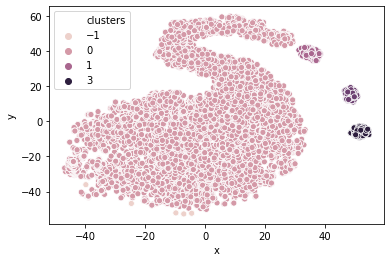

In [20]:
# Here we are graphing all the meshd terms based on their word embeddings and visulized in a way that makes it
# ideal to see clusters.
df_meshd['x'] = tsne_features[:,0]
df_meshd['y'] = tsne_features[:,1]
sns.scatterplot(x="x", y="y", data=df_meshd, hue="clusters")
plt.show()

In [21]:
# Use this line to check the index of each cluster.
df_meshd.loc[df_meshd["clusters"] == 1].index

Index(['meshd013854', 'meshd019142', 'meshd064749', 'meshd006144',
       'meshd011413', 'meshd009450', 'meshd011299', 'meshd010263',
       'meshd008761', 'meshd020162',
       ...
       'meshd047408', 'meshd010705', 'meshd001539', 'meshd000068557',
       'meshd002194', 'meshd004129', 'meshd002592', 'meshd002093',
       'meshd065706', 'meshd062845'],
      dtype='object', length=136)

## Cluster Pertinent Neoplasms vs Kinases
Here we will use a tsne plot to cluster the neoplasms with specific treatments against the kinases that have drugs which target them. This should demonstrate the difference between the two groups.

In [22]:
# Create a dataframe from the kinase and neoplasm dataframes with labels for kinase or neoplasm
vectors_kinases['type'] = "kinase"
vectors_neoplasms['type'] = "neoplasm"
neoplasms_kinases = pd.concat([vectors_kinases, vectors_neoplasms])
neoplasms_kinases

<ipython-input-22-51c65f08d12b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vectors_kinases['type'] = "kinase"
<ipython-input-22-51c65f08d12b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vectors_neoplasms['type'] = "neoplasm"


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,type
EGFR,-2.793096,-1.400721,2.661574,1.428910,2.343403,2.701495,-1.232546,-6.792243,0.777371,0.239884,...,2.246006,0.106285,-1.804211,-2.520545,-2.597605,-2.567282,0.271866,2.415240,0.748469,kinase
ERBB2,-3.379890,-0.868212,2.287552,0.922983,0.927796,2.822068,-1.857279,-6.076023,-0.010853,0.538869,...,3.152063,0.805483,-1.124061,-2.775210,-2.463067,-1.912609,0.587321,3.346928,1.557681,kinase
MTOR,-2.289190,-0.335569,4.002855,1.952890,2.457987,3.032823,-2.082819,-4.665023,0.588561,1.375662,...,3.645977,-0.362688,-1.503982,-2.836142,-2.580600,-1.763735,1.390236,3.144964,0.696867,kinase
MAPK14,-2.015385,-1.348477,2.336516,2.780311,1.729705,2.505942,-1.023994,-6.823522,1.397007,-0.088559,...,3.919389,-0.083821,-0.923605,-2.728579,-1.824180,-0.952995,0.979741,3.319761,1.191692,kinase
BRAF,-2.661229,-1.584948,3.729240,1.299216,1.806623,2.546173,-2.091038,-6.037558,1.069091,1.269181,...,1.989163,0.355751,-0.749616,-2.867014,-2.414918,-1.072222,1.002138,2.695667,0.602228,kinase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nevus, Blue",-0.955047,-0.554429,1.536188,1.105055,0.788489,1.159802,-0.585510,-3.379834,0.314603,0.302816,...,1.305177,-0.209394,-0.940914,-0.997839,-1.108797,-0.964230,0.120354,1.153790,0.083706,neoplasm
"Leukemia, Myeloid, Chronic-Phase",-1.657664,-0.262865,1.929939,0.885094,0.773384,1.541235,-1.048441,-4.637346,0.445170,0.180971,...,1.545820,0.214380,-1.282386,-1.873098,-1.506382,-0.925962,0.206791,1.525827,0.560311,neoplasm
Blast Crisis,-1.394444,-0.296604,0.974149,0.680643,0.256340,1.190357,-0.293524,-2.205337,0.287871,-0.101122,...,0.837900,-0.151664,-0.710165,-0.937718,-0.932980,-0.374456,-0.190262,0.684949,0.052332,neoplasm
Neurofibromatosis 1,-1.850935,-0.632097,1.111173,0.926026,0.610363,1.830307,-0.515190,-2.641831,0.016671,0.058933,...,1.147409,-0.109541,-0.643259,-1.096002,-0.845952,-0.700239,0.334201,0.863677,0.025829,neoplasm


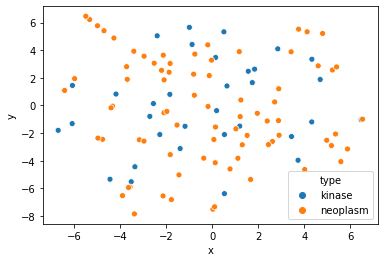

In [23]:
# Create a TSNE plot color coding the two groups.
neoplasms_kinases_numerical = neoplasms_kinases.drop(['type'], axis=1)
m2 = TSNE(learning_rate=50, n_jobs=10)
tsne_features = m2.fit_transform(neoplasms_kinases_numerical)
# We can adjust the eps to get more or less clusters
get_clusters = DBSCAN(eps=3, min_samples=10).fit_predict(tsne_features)

neoplasms_kinases["clusters"] = get_clusters
neoplasms_kinases['x'] = tsne_features[:,0]
neoplasms_kinases['y'] = tsne_features[:,1]
sns.scatterplot(x="x", y="y", data=neoplasms_kinases, hue="type")
plt.show()

In [24]:
set(get_clusters)

{0}

In [25]:
# Use this line to look as different clusters
neoplasms_kinases.loc[neoplasms_kinases["clusters"] == 0].index

Index(['EGFR', 'ERBB2', 'MTOR', 'MAPK14', 'BRAF', 'SRC', 'ABL1', 'KIT', 'KDR',
       'RET',
       ...
       'Kasabach-Merritt Syndrome', 'Myofibroma',
       'Lymphoma, Large B-Cell, Diffuse', 'Carcinoma, Large Cell',
       'Gastrointestinal Neoplasms', 'Nevus, Blue',
       'Leukemia, Myeloid, Chronic-Phase', 'Blast Crisis',
       'Neurofibromatosis 1', 'Neurofibromatoses'],
      dtype='object', length=112)

## Cluster Genes vs Meshd
Here we are looking at terms that were genes vs terms with a meshd.

In [26]:
df_meshd['type'] = "meshd"
df_ncbigen['type'] = "genes"
genes_meshd = pd.concat([df_meshd, df_ncbigen]).drop(['clusters', 'x', 'y'], axis = 1)
genes_meshd

<ipython-input-26-1d0d09fcf4a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meshd['type'] = "meshd"
<ipython-input-26-1d0d09fcf4a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ncbigen['type'] = "genes"


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,type
meshd009369,-2.679750,-1.177165,3.586595,2.403354,2.074462,2.940534,-2.092840,-6.245307,0.678010,0.505695,...,3.780937,0.313964,-2.557980,-2.331291,-2.706614,-1.122745,0.115335,3.934741,0.530273,meshd
meshd001943,-2.844982,-1.075482,3.050876,1.481965,2.133099,2.656748,-2.087206,-6.045259,1.289581,0.695806,...,1.924188,0.201234,-1.991328,-1.967682,-2.852643,-2.295500,0.425305,2.875993,-0.000095,meshd
meshd009362,-2.762235,-1.124624,2.550965,1.909827,1.944338,2.834550,-1.900684,-6.088246,-0.000188,0.042979,...,4.799924,0.478214,-2.795484,-2.992696,-2.536763,-1.465226,1.227873,3.218571,0.758465,meshd
meshd015179,-2.784621,-1.010267,2.702152,2.948521,2.442838,2.481541,-0.295279,-6.838433,1.665160,-0.423807,...,3.011538,0.070296,-1.914129,-3.760688,-2.546317,-0.917993,0.766176,2.417626,1.552744,meshd
meshd011471,-2.914917,-1.222976,4.939323,2.256618,2.602686,2.988810,-3.172240,-6.391949,-0.105856,0.397289,...,2.707156,0.170918,-1.476368,-2.180959,-2.848729,-1.896152,1.209435,2.584643,0.209949,meshd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ncbigene851461,-0.541203,-0.195806,0.227092,0.181896,0.199286,0.510765,-0.218105,-0.517846,0.239082,-0.066777,...,0.196366,-0.235849,-0.196819,-0.172592,-0.266105,-0.185938,-0.159237,0.089297,0.152632,genes
ncbigene398298,-0.528845,0.081103,0.031843,0.078858,0.028312,0.510638,-0.089900,-0.489033,-0.007654,-0.147645,...,0.021714,-0.123813,-0.106271,-0.026559,-0.295459,-0.029227,-0.213947,0.059539,-0.082666,genes
ncbigene101689109,-0.502647,0.006259,0.267115,0.088350,0.175760,0.471863,0.092884,-0.485942,-0.057100,-0.102981,...,0.361944,-0.218957,-0.133128,-0.339934,-0.425278,-0.129439,-0.255878,0.094993,-0.304350,genes
ncbigene855552,-0.450685,0.086574,0.279501,-0.081683,0.090200,0.465735,0.092774,-0.519475,-0.090797,-0.209095,...,0.264168,-0.180526,-0.002720,-0.145801,-0.449549,0.049877,-0.170567,0.162133,-0.192504,genes


In [27]:
df_meshd.shape

(7411, 104)

In [28]:
genes_meshd_numerical = genes_meshd.drop(['type'], axis=1)
m2 = TSNE(learning_rate=50, n_jobs=10)
tsne_features = m2.fit_transform(genes_meshd_numerical)

In [29]:
get_clusters = DBSCAN(eps=1, min_samples=10).fit_predict(tsne_features)
genes_meshd["clusters"] = get_clusters
genes_meshd['x'] = tsne_features[:,0]
genes_meshd['y'] = tsne_features[:,1]

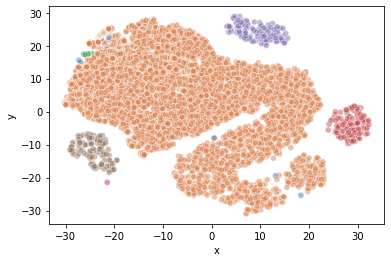

In [30]:
# This plots all the genes according to the tsne created for both the genes and the meshd terms
sns.scatterplot(x="x", y="y", data=genes_meshd.loc[genes_meshd["type"] == "meshd"], hue="clusters", palette="deep", alpha=0.5, legend=False)
plt.show()

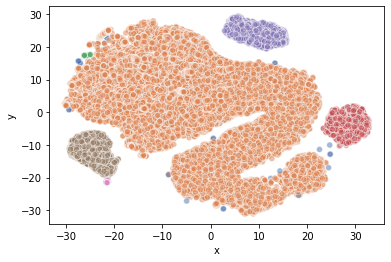

In [31]:
# This plots all the meshd terms according to the tsne created for both the genes and the meshd terms
sns.scatterplot(x="x", y="y", data=genes_meshd.loc[genes_meshd["type"] == "genes"], hue="clusters", palette="deep", style="type", alpha=0.5, legend=False)
plt.show()

In [32]:
set(get_clusters)

{-1, 0, 1, 2, 3, 4, 5}

In [33]:
# Use this to examine clusters
genes_meshd.loc[genes_meshd["clusters"] == 4].index

Index(['meshd007701', 'meshd009526', 'meshd001590', 'meshd001177',
       'meshd010850', 'meshd005683', 'meshd006600', 'meshd003918',
       'meshd000441', 'meshd013150',
       ...
       'ncbigene100350666', 'ncbigene100359228', 'ncbigene101843619',
       'ncbigene64543', 'ncbigene100310874', 'ncbigene851461',
       'ncbigene398298', 'ncbigene101689109', 'ncbigene855552',
       'ncbigene100233188'],
      dtype='object', length=2312)

## Create TSNE of Pertinant Neoplasms
Here we are just examing the neoplasms that came up as having a kinase drug as a treatment.

In [34]:
vectors_neoplasms_numerical = vectors_neoplasms.drop(["type"], axis=1)
vectors_neoplasms_numerical

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Neoplasms,-2.679750,-1.177165,3.586595,2.403354,2.074462,2.940534,-2.092840,-6.245307,0.678010,0.505695,...,-5.091603,3.780937,0.313964,-2.557980,-2.331291,-2.706614,-1.122745,0.115335,3.934741,0.530273
Breast Neoplasms,-2.844982,-1.075482,3.050876,1.481965,2.133099,2.656748,-2.087206,-6.045259,1.289581,0.695806,...,-4.451932,1.924188,0.201234,-1.991328,-1.967682,-2.852643,-2.295500,0.425305,2.875993,-0.000095
Neoplasm Metastasis,-2.762235,-1.124624,2.550965,1.909827,1.944338,2.834550,-1.900684,-6.088246,-0.000188,0.042979,...,-2.679739,4.799924,0.478214,-2.795484,-2.992696,-2.536763,-1.465226,1.227873,3.218571,0.758465
Colorectal Neoplasms,-2.784621,-1.010267,2.702152,2.948521,2.442838,2.481541,-0.295279,-6.838433,1.665160,-0.423807,...,-4.225421,3.011538,0.070296,-1.914129,-3.760688,-2.546317,-0.917993,0.766176,2.417626,1.552744
Melanoma,-3.068348,-0.387642,3.266111,2.085498,0.984722,2.350824,-1.628417,-5.742020,0.444275,0.731641,...,-2.696768,2.355240,0.085972,-2.109510,-2.862632,-2.431120,-1.955214,-0.614977,2.669726,0.620560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nevus, Blue",-0.955047,-0.554429,1.536188,1.105055,0.788489,1.159802,-0.585510,-3.379834,0.314603,0.302816,...,-1.878420,1.305177,-0.209394,-0.940914,-0.997839,-1.108797,-0.964230,0.120354,1.153790,0.083706
"Leukemia, Myeloid, Chronic-Phase",-1.657664,-0.262865,1.929939,0.885094,0.773384,1.541235,-1.048441,-4.637346,0.445170,0.180971,...,-2.165368,1.545820,0.214380,-1.282386,-1.873098,-1.506382,-0.925962,0.206791,1.525827,0.560311
Blast Crisis,-1.394444,-0.296604,0.974149,0.680643,0.256340,1.190357,-0.293524,-2.205337,0.287871,-0.101122,...,-1.251553,0.837900,-0.151664,-0.710165,-0.937718,-0.932980,-0.374456,-0.190262,0.684949,0.052332
Neurofibromatosis 1,-1.850935,-0.632097,1.111173,0.926026,0.610363,1.830307,-0.515190,-2.641831,0.016671,0.058933,...,-1.557673,1.147409,-0.109541,-0.643259,-1.096002,-0.845952,-0.700239,0.334201,0.863677,0.025829


In [35]:
m = TSNE(learning_rate=50, n_jobs=10)

In [36]:
tsne_features = m.fit_transform(vectors_neoplasms_numerical)

<ipython-input-37-adda9ddba4af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vectors_neoplasms['clusters'] = get_clusters
<ipython-input-37-adda9ddba4af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vectors_neoplasms['x'] = tsne_features[:,0]
<ipython-input-37-adda9ddba4af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

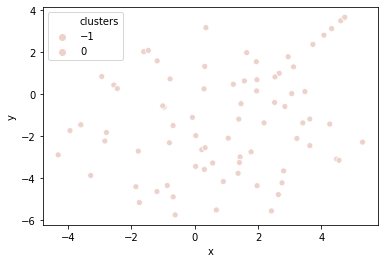

In [37]:
tsne_features[1:100,:]
get_clusters = DBSCAN(eps=1, min_samples=10).fit_predict(tsne_features)
vectors_neoplasms['clusters'] = get_clusters
vectors_neoplasms['x'] = tsne_features[:,0]
vectors_neoplasms['y'] = tsne_features[:,1]


sns.scatterplot(x="x", y="y", data=vectors_neoplasms, hue="clusters")
plt.show()

## Random Forest to Separate Neoplasm from Kinases
To determine if our word embeddings contain information sufficient to classify a Neoplasm vs a kinase we use a random forest to classify disease and kinases from the list of neoplasms with kinase drugs treating them.

In [38]:
neoplasms_kinases.drop(["clusters", "x", "y"], axis=1, inplace=True)
neoplasms_kinases

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,type
EGFR,-2.793096,-1.400721,2.661574,1.428910,2.343403,2.701495,-1.232546,-6.792243,0.777371,0.239884,...,2.246006,0.106285,-1.804211,-2.520545,-2.597605,-2.567282,0.271866,2.415240,0.748469,kinase
ERBB2,-3.379890,-0.868212,2.287552,0.922983,0.927796,2.822068,-1.857279,-6.076023,-0.010853,0.538869,...,3.152063,0.805483,-1.124061,-2.775210,-2.463067,-1.912609,0.587321,3.346928,1.557681,kinase
MTOR,-2.289190,-0.335569,4.002855,1.952890,2.457987,3.032823,-2.082819,-4.665023,0.588561,1.375662,...,3.645977,-0.362688,-1.503982,-2.836142,-2.580600,-1.763735,1.390236,3.144964,0.696867,kinase
MAPK14,-2.015385,-1.348477,2.336516,2.780311,1.729705,2.505942,-1.023994,-6.823522,1.397007,-0.088559,...,3.919389,-0.083821,-0.923605,-2.728579,-1.824180,-0.952995,0.979741,3.319761,1.191692,kinase
BRAF,-2.661229,-1.584948,3.729240,1.299216,1.806623,2.546173,-2.091038,-6.037558,1.069091,1.269181,...,1.989163,0.355751,-0.749616,-2.867014,-2.414918,-1.072222,1.002138,2.695667,0.602228,kinase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nevus, Blue",-0.955047,-0.554429,1.536188,1.105055,0.788489,1.159802,-0.585510,-3.379834,0.314603,0.302816,...,1.305177,-0.209394,-0.940914,-0.997839,-1.108797,-0.964230,0.120354,1.153790,0.083706,neoplasm
"Leukemia, Myeloid, Chronic-Phase",-1.657664,-0.262865,1.929939,0.885094,0.773384,1.541235,-1.048441,-4.637346,0.445170,0.180971,...,1.545820,0.214380,-1.282386,-1.873098,-1.506382,-0.925962,0.206791,1.525827,0.560311,neoplasm
Blast Crisis,-1.394444,-0.296604,0.974149,0.680643,0.256340,1.190357,-0.293524,-2.205337,0.287871,-0.101122,...,0.837900,-0.151664,-0.710165,-0.937718,-0.932980,-0.374456,-0.190262,0.684949,0.052332,neoplasm
Neurofibromatosis 1,-1.850935,-0.632097,1.111173,0.926026,0.610363,1.830307,-0.515190,-2.641831,0.016671,0.058933,...,1.147409,-0.109541,-0.643259,-1.096002,-0.845952,-0.700239,0.334201,0.863677,0.025829,neoplasm


In [39]:
X = neoplasms_kinases.drop(["type"], axis=1).values
y = neoplasms_kinases.type.values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [41]:
regressor = RandomForestClassifier(n_estimators=20, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [42]:
# This will produce a score for us
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 1  6]
 [ 1 15]]
              precision    recall  f1-score   support

      kinase       0.50      0.14      0.22         7
    neoplasm       0.71      0.94      0.81        16

    accuracy                           0.70        23
   macro avg       0.61      0.54      0.52        23
weighted avg       0.65      0.70      0.63        23

0.6956521739130435


In [43]:
# We also want to visualize the test data using a pca
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
y_test_color = []
for id_type in y_test:
    if id_type == "kinase":
        y_test_color.append('blue')
    else:
        y_test_color.append('red')


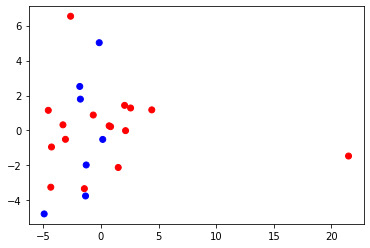

In [44]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test_color)
plt.show()

## Cluster Neoplasms vs other Meshd terms
Here we are clustering neoplasm from the curated list against all other meshd terms.

In [45]:
df_meshd_neoplasms = df_meshd

In [46]:
df_meshd_neoplasms = df_meshd.drop(["x", "y", "clusters", "type"], axis=1)

In [47]:
neoplasm_labels = pd.read_csv("../input/neoplasms_labels.tsv",  sep= "\t", names=["mesh_id", "disease", "synonyms"])
neoplasm_labels.head()

,mesh_id,disease,synonyms
0,D000008,Abdominal Neoplasms,"Abdominal Neoplasm; Neoplasm, Abdominal; Neopl..."
1,D000069293,Plasmablastic Lymphoma,"Lymphoma, Plasmablastic; Lymphomas, Plasmablas..."
2,D000069295,Mammary Analogue Secretory Carcinoma,NaN
3,D000069584,Unilateral Breast Neoplasms,"Breast Neoplasm, Unilateral; Breast Neoplasms,..."
4,D000070779,Giant Cell Tumor of Tendon Sheath,NaN


In [48]:
neoplasm_labels.index = ["meshd" + mesh[1:] for mesh in neoplasm_labels["mesh_id"].values]

In [49]:
neoplasm_labels

,mesh_id,disease,synonyms
meshd000008,D000008,Abdominal Neoplasms,"Abdominal Neoplasm; Neoplasm, Abdominal; Neopl..."
meshd000069293,D000069293,Plasmablastic Lymphoma,"Lymphoma, Plasmablastic; Lymphomas, Plasmablas..."
meshd000069295,D000069295,Mammary Analogue Secretory Carcinoma,NaN
meshd000069584,D000069584,Unilateral Breast Neoplasms,"Breast Neoplasm, Unilateral; Breast Neoplasms,..."
meshd000070779,D000070779,Giant Cell Tumor of Tendon Sheath,NaN
...,...,...,...
meshd064726,D064726,Triple Negative Breast Neoplasms,NaN
meshd065309,D065309,Atypical Squamous Cells of the Cervix,NaN
meshd065310,D065310,Squamous Intraepithelial Lesions of the Cervix,NaN
meshd065311,D065311,Adenocarcinoma in Situ,"Adenocarcinoma in Situs; Situ, Adenocarcinoma ..."


In [50]:
neoplasm_dict = pd.Series(neoplasm_labels.disease.values, index=neoplasm_labels.index).to_dict()

In [51]:
df_meshd_neoplasms.index = df_meshd_neoplasms.index.to_series().replace(neoplasm_dict)


In [52]:
df_meshd_neoplasms.loc[:, "type"] = "general"
df_meshd_neoplasms.loc[~df_meshd_neoplasms.index.str.contains("meshd"), ["type"]] = "neoplasm"

In [53]:
df_meshd_neoplasms.loc[df_meshd_neoplasms["type"] == "neoplasm"].shape
df_meshd_neoplasms_balanced = df_meshd_neoplasms.loc[df_meshd_neoplasms["type"] == "neoplasm"]
# We have to take a sample of the genes so that our data is balanced.
df_meshd_neoplasms_balanced = pd.concat([df_meshd_neoplasms_balanced, df_meshd_neoplasms.loc[df_meshd_neoplasms["type"] == "general"].sample(df_meshd_neoplasms_balanced.shape[0])])
df_meshd_neoplasms_balanced

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,type
Neoplasms,-2.679750,-1.177165,3.586595,2.403354,2.074462,2.940534,-2.092840,-6.245307,0.678010,0.505695,...,3.780937,0.313964,-2.557980,-2.331291,-2.706614,-1.122745,0.115335,3.934741,0.530273,neoplasm
Breast Neoplasms,-2.844982,-1.075482,3.050876,1.481965,2.133099,2.656748,-2.087206,-6.045259,1.289581,0.695806,...,1.924188,0.201234,-1.991328,-1.967682,-2.852643,-2.295500,0.425305,2.875993,-0.000095,neoplasm
Neoplasm Metastasis,-2.762235,-1.124624,2.550965,1.909827,1.944338,2.834550,-1.900684,-6.088246,-0.000188,0.042979,...,4.799924,0.478214,-2.795484,-2.992696,-2.536763,-1.465226,1.227873,3.218571,0.758465,neoplasm
Colorectal Neoplasms,-2.784621,-1.010267,2.702152,2.948521,2.442838,2.481541,-0.295279,-6.838433,1.665160,-0.423807,...,3.011538,0.070296,-1.914129,-3.760688,-2.546317,-0.917993,0.766176,2.417626,1.552744,neoplasm
Prostatic Neoplasms,-2.914917,-1.222976,4.939323,2.256618,2.602686,2.988810,-3.172240,-6.391949,-0.105856,0.397289,...,2.707156,0.170918,-1.476368,-2.180959,-2.848729,-1.896152,1.209435,2.584643,0.209949,neoplasm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
meshd000068298,-1.861658,-0.633735,2.383182,0.464149,0.861055,1.562113,-1.380238,-4.952354,-0.091498,0.618365,...,1.912609,0.118972,-1.747808,-1.784542,-2.209403,-1.495678,0.323162,1.999264,-0.012035,general
meshd001745,-2.317125,-1.839035,2.957569,1.779128,3.067103,2.582248,-2.538650,-6.126320,0.278973,-0.720032,...,1.809264,-0.237361,-1.801853,-1.424265,-2.442826,-0.567024,0.948875,2.888848,1.391651,general
meshd002015,-1.639028,-0.155755,1.755620,1.357305,1.179337,1.725900,-1.353262,-3.682182,0.540281,0.203990,...,1.561766,-0.092423,-1.289695,-1.747831,-1.971605,-0.999992,0.069854,1.680359,0.622248,general
meshd006897,-1.714445,-0.350347,2.239713,1.406201,1.162123,2.039013,-0.834306,-3.507306,0.381124,0.521981,...,1.741832,0.010056,-0.892309,-1.207113,-1.657704,-0.936101,0.330198,2.361609,0.530347,general


In [54]:
X = df_meshd_neoplasms_balanced.drop(["type"], axis=1).values
y = df_meshd_neoplasms_balanced.type.values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [56]:
classifier = SVC(random_state=42)
#classifier = RandomForestClassifier(n_estimators=20, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [57]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[104  30]
 [ 39  92]]
              precision    recall  f1-score   support

     general       0.73      0.78      0.75       134
    neoplasm       0.75      0.70      0.73       131

    accuracy                           0.74       265
   macro avg       0.74      0.74      0.74       265
weighted avg       0.74      0.74      0.74       265

0.7396226415094339


In [58]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
y_test_color = []
for id_type in y_test:
    if id_type == "neoplasm":
        y_test_color.append('blue')
    else:
        y_test_color.append('red')


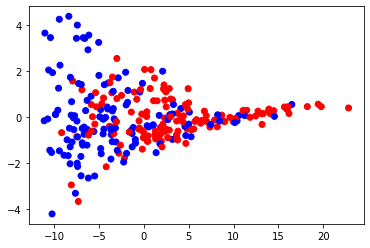

In [59]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test_color)
plt.show()

## SimVerb Test
SimVerb is a data set of verbs and their relations. While our data are lacking in everyday nouns, the verbs in scientific literature are relatively common. Therefore, see if we can use our word vectors to determine if two words are synonyms or antonyms using a random forest classifier.

In [60]:
# Get synonyms in the set of word embeddings
SimVerb = pd.read_csv("../input/SimVerb-3500.txt",  sep= "\t", names=["word1", "word2", "?", "relatedness", "relationship"])
SimVerb_synonyms = SimVerb.loc[SimVerb["relationship"]=="SYNONYMS"]
synonym_index = (SimVerb_synonyms.word1.isin(df.index)) & (SimVerb_synonyms.word2.isin(df.index))
SimVerb_synonyms = SimVerb_synonyms.loc[synonym_index]
SimVerb_synonyms

,word1,word2,?,relatedness,relationship
0,take,remove,V,6.81,SYNONYMS
3,shine,polish,V,7.80,SYNONYMS
29,bake,broil,V,5.98,SYNONYMS
34,decay,decompose,V,8.30,SYNONYMS
56,jump,skip,V,5.48,SYNONYMS
...,...,...,...,...,...
3458,deal,cope,V,7.47,SYNONYMS
3459,cope,manage,V,7.14,SYNONYMS
3460,deal,manage,V,6.14,SYNONYMS
3462,care,worry,V,6.31,SYNONYMS


In [61]:
# Get antonyms in the set of word embeddings
SimVerb_antonyms = SimVerb.loc[SimVerb["relationship"]=="ANTONYMS"]
antonym_index = (SimVerb_antonyms.word1.isin(df.index)) & (SimVerb_antonyms.word2.isin(df.index))
SimVerb_antonyms = SimVerb_antonyms.loc[antonym_index]
SimVerb_antonyms

,word1,word2,?,relatedness,relationship
2,feed,starve,V,1.49,ANTONYMS
26,connect,separate,V,1.49,ANTONYMS
37,forget,recall,V,0.33,ANTONYMS
80,sell,purchase,V,2.16,ANTONYMS
83,melt,freeze,V,0.17,ANTONYMS
...,...,...,...,...,...
2859,separate,join,V,0.33,ANTONYMS
2910,lose,obtain,V,0.33,ANTONYMS
2966,get,keep,V,5.58,ANTONYMS
3035,break,build,V,0.83,ANTONYMS


In [62]:
synonym_vectors = pd.DataFrame()
synonym_index_links = []
for word1, word2 in SimVerb_synonyms[["word1", "word2"]].values:
    # Notice that we are subtracting the vectors of words even though they are bidirectional.
    # This could probably be improved but I don't have any good ideas yet.
    synonym_index_links.append(word1 + "-" + word2)
    vector_item = df.loc[word1] - df.loc[word2]
    synonym_vectors = synonym_vectors.append(vector_item, ignore_index=True)
synonym_vectors.index = synonym_index_links
synonym_vectors

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
take-remove,-0.248701,-1.876224,-2.536418,-1.127521,-0.055729,0.948357,-0.063927,-1.456854,0.018772,-0.590358,...,-1.063644,0.340740,0.749846,0.140537,-0.897896,-0.367066,3.428068,0.524239,1.299040,-0.011730
shine-polish,0.146829,0.748674,-0.270706,-0.287366,0.233115,0.190423,1.434255,1.730561,-0.758107,-0.455692,...,1.717817,-1.754638,0.160395,0.393861,0.251960,-0.039575,1.948583,-0.426901,-0.067764,-0.768005
bake-broil,0.124827,-0.421857,-0.215678,1.130489,0.675519,0.887174,-0.740563,-0.641662,-0.092627,-0.485722,...,0.187529,-0.558932,0.293752,0.068212,-0.062778,-0.427225,-0.072427,0.142877,-0.289176,0.080231
decay-decompose,-0.227365,-0.762439,0.753115,-0.113521,0.344209,0.576834,-0.781853,-1.764650,0.972103,-0.043826,...,-0.256403,0.242465,-0.513727,0.221071,0.863865,0.165057,-0.012268,-0.542304,-0.272658,0.116485
jump-skip,-0.057139,-0.064765,1.585615,-0.061808,1.121263,-0.093408,0.212237,1.058724,2.006936,0.519640,...,0.281747,0.538916,-0.185862,-0.421459,-0.480903,-0.248700,-1.264721,0.678821,0.053625,0.872713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
deal-cope,-0.004970,-0.386450,0.440744,-0.845432,0.519758,0.693179,-0.350909,0.066883,0.588738,0.484473,...,1.599640,0.276013,0.218458,-0.327131,-1.231880,0.082124,0.062312,0.105951,0.834380,0.449959
cope-manage,-0.513283,-0.275232,0.066116,0.592954,-0.496796,0.219984,0.031084,0.252545,-1.203161,-1.709087,...,0.671022,-1.409085,-0.339344,-0.359320,0.593357,0.080721,-1.926858,0.702854,0.901366,0.458284
deal-manage,-0.518252,-0.661683,0.506860,-0.252478,0.022962,0.913163,-0.319826,0.319427,-0.614424,-1.224614,...,2.270662,-1.133072,-0.120886,-0.686451,-0.638522,0.162845,-1.864546,0.808805,1.735747,0.908243
care-worry,-0.893089,0.825344,2.012960,0.880879,1.204835,0.563753,-0.518058,-1.431475,-0.360821,-0.998187,...,0.301128,-0.850331,-0.456116,-0.762290,0.176556,-0.757716,-0.503697,-0.292358,-0.097611,-0.458424


In [63]:
# Same as above
antonym_vectors = pd.DataFrame()
antonym_index_links = []
for word1, word2 in SimVerb_antonyms[["word1", "word2"]].values:
    antonym_index_links.append(word1 + "-" + word2)
    vector_item = df.loc[word1] - df.loc[word2]
    antonym_vectors = antonym_vectors.append(vector_item, ignore_index=True)
antonym_vectors.index = antonym_index_links
antonym_vectors

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
feed-starve,-0.205060,-0.110590,1.325550,0.235849,-0.629303,-0.425408,0.891663,-1.808772,1.556271,0.813085,...,1.585487,-0.462642,-0.036611,-0.735058,1.187335,-0.243685,-0.760953,-0.465128,-0.273562,-1.132134
connect-separate,-0.844954,-0.152716,1.967310,0.028368,-0.436661,0.101752,1.628600,-1.873210,0.319680,-0.777860,...,-1.326887,0.633271,0.138231,0.703603,0.839024,0.028553,-1.331360,-0.370843,0.011507,1.650941
forget-recall,0.696522,-0.464983,-0.373092,-0.615787,-0.446305,-0.003324,0.538087,-1.276854,-0.129780,-0.981288,...,-0.689899,0.937816,-0.283997,0.272823,0.277169,0.177180,-0.574259,-0.159872,0.196330,-0.084494
sell-purchase,-0.164710,-0.943762,-0.093434,-0.157815,-1.167134,-0.273026,0.304776,1.579581,-0.894903,-1.003972,...,-0.934217,-0.097261,-1.014795,-0.021952,0.838279,0.148668,-0.086459,-0.532381,-0.334591,0.156096
melt-freeze,0.199585,0.455581,-1.249124,-0.464366,-0.096414,-1.806907,1.052887,1.796418,0.379380,-0.748868,...,-2.060997,-2.104614,-0.734580,2.075465,0.645289,0.863860,-0.627563,-1.926243,-0.896991,0.699600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
separate-join,-0.156439,0.478985,0.894721,-0.429160,1.118459,0.763417,0.494384,-0.455300,-0.104286,0.189390,...,1.048623,0.156192,-0.903936,-0.616706,-1.103753,0.457141,0.836933,0.069706,1.017313,-0.446636
lose-obtain,-0.019272,0.712558,-0.207998,0.778234,-0.651299,-0.248549,1.066200,-0.019268,-0.099785,-1.133809,...,-0.838112,-0.045763,0.516196,0.313525,0.755558,0.709749,0.717243,1.030141,-0.657738,1.479991
get-keep,0.404633,0.177154,-1.008437,0.307934,-1.930416,0.223435,0.535000,0.928752,0.551626,0.185836,...,0.001718,-1.499982,-0.122791,1.484654,-0.653048,0.431919,-0.163215,-0.418001,-0.121111,-0.353875
break-build,-0.500729,0.521716,1.214792,-0.026821,0.901751,0.540199,0.381057,-3.620681,0.193747,0.031989,...,-0.974885,0.274978,0.764618,-1.923775,-1.353863,-0.612948,0.051439,-1.069076,1.530230,-0.645083


In [64]:
synonym_vectors["relationship"] = "synonym"
antonym_vectors["relationship"] = "antonym"
# We have to take a sample of the synonyms so that we do not have an unbalanced dataset
relationship_vectors = pd.concat([synonym_vectors.sample(antonym_vectors.shape[0]), antonym_vectors])
relationship_vectors

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,relationship
buy-purchase,0.219052,-0.595696,-0.658338,0.775896,-0.673658,-0.135950,0.995742,0.491078,0.443638,-0.876447,...,-0.031819,-0.463998,0.730378,1.222174,0.545431,-0.465370,-0.509454,-0.685805,0.292783,synonym
write-compose,-0.065922,1.297411,-1.060123,0.333726,0.501263,0.299682,-1.203846,2.209545,-1.476648,-0.229230,...,-1.058954,0.717892,-0.214610,-0.860723,0.359344,-0.658894,0.414509,-0.696501,-1.541931,synonym
live-survive,0.572531,0.290248,1.196983,0.114240,1.052613,-0.066615,-0.926532,1.290243,0.330360,0.045950,...,1.199350,0.029818,0.168447,1.543815,0.078431,-0.414432,0.478322,-1.595332,-0.353752,synonym
make-do,-0.294893,-0.786905,3.195524,0.115582,0.661578,0.283678,0.748235,-1.127270,0.855439,-0.432332,...,0.030090,-0.602131,-1.649634,1.313571,-0.077884,-0.578714,-0.775491,-0.448365,0.157652,synonym
tap-rap,0.408969,-0.743590,-0.684096,1.380371,0.388536,0.681335,0.115743,0.510640,-0.099425,0.841462,...,0.136705,-1.001182,-0.674021,0.283705,0.187943,0.342852,0.063205,-1.163841,0.297425,synonym
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
separate-join,-0.156439,0.478985,0.894721,-0.429160,1.118459,0.763417,0.494384,-0.455300,-0.104286,0.189390,...,0.156192,-0.903936,-0.616706,-1.103753,0.457141,0.836933,0.069706,1.017313,-0.446636,antonym
lose-obtain,-0.019272,0.712558,-0.207998,0.778234,-0.651299,-0.248549,1.066200,-0.019268,-0.099785,-1.133809,...,-0.045763,0.516196,0.313525,0.755558,0.709749,0.717243,1.030141,-0.657738,1.479991,antonym
get-keep,0.404633,0.177154,-1.008437,0.307934,-1.930416,0.223435,0.535000,0.928752,0.551626,0.185836,...,-1.499982,-0.122791,1.484654,-0.653048,0.431919,-0.163215,-0.418001,-0.121111,-0.353875,antonym
break-build,-0.500729,0.521716,1.214792,-0.026821,0.901751,0.540199,0.381057,-3.620681,0.193747,0.031989,...,0.274978,0.764618,-1.923775,-1.353863,-0.612948,0.051439,-1.069076,1.530230,-0.645083,antonym


In [65]:
X = relationship_vectors.drop(["relationship"], axis=1).values
y = relationship_vectors.relationship.values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [67]:
#classifier = SVC(random_state=42)
classifier = RandomForestClassifier(n_estimators=60, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [68]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 8 12]
 [11 11]]
              precision    recall  f1-score   support

     antonym       0.42      0.40      0.41        20
     synonym       0.48      0.50      0.49        22

    accuracy                           0.45        42
   macro avg       0.45      0.45      0.45        42
weighted avg       0.45      0.45      0.45        42

0.4523809523809524


In [69]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
y_test_color = []
for id_type in y_test:
    if id_type == "synonym":
        y_test_color.append('blue')
    else:
        y_test_color.append('red')


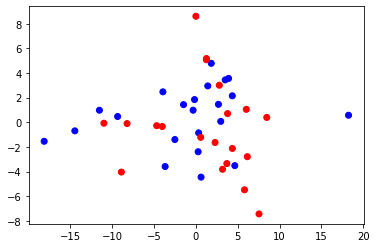

In [70]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test_color)
plt.show()